In [1]:
%matplotlib widget

In [22]:
import pathlib as pl

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec

import niclips.image as noimg
from niclips.defaults import get_default_coord, get_default_vmin_vmax

In [2]:
dwi_fpath = pl.Path(
    '/home/jkai/bridges/bio220042p/project/0_sandbox/prime-de/ucdavis/bids/sub-032125/ses-001/dwi/sub-032125_ses-001_acq-AP_run-1_dwi.nii.gz'
    # '/home/jkai/bridges/med220004p/shared/data_derived/HCP-Retest/preprocessed/sub-103818/ses-test/dwi/sub-103818_ses-test_dwi.nii.gz'
    # '/home/jkai/bridges/bio220042p/shared/data/NKI_monkey/incoming/sub-FIONNA/ses-20170126/dwi/sub-FIONNA_ses-20170126_acq-DSIq5_dwi.nii.gz'
)
bval_fpath = dwi_fpath.with_suffix('').with_suffix(".bval")
bvec_fpath = dwi_fpath.with_suffix('').with_suffix(".bvec")
assert all([dwi_fpath.exists(), bval_fpath.exists(), bvec_fpath.exists()])

dwi = nib.nifti1.load(dwi_fpath)

In [25]:
frame = noimg.render_slice(dwi, axis=2, coord=coord, vmin=vmin, vmax=vmax, fontsize=18)

IndexError: index 3 is out of bounds for axis 0 with size 3

IndexError: index 3 is out of bounds for axis 0 with size 3

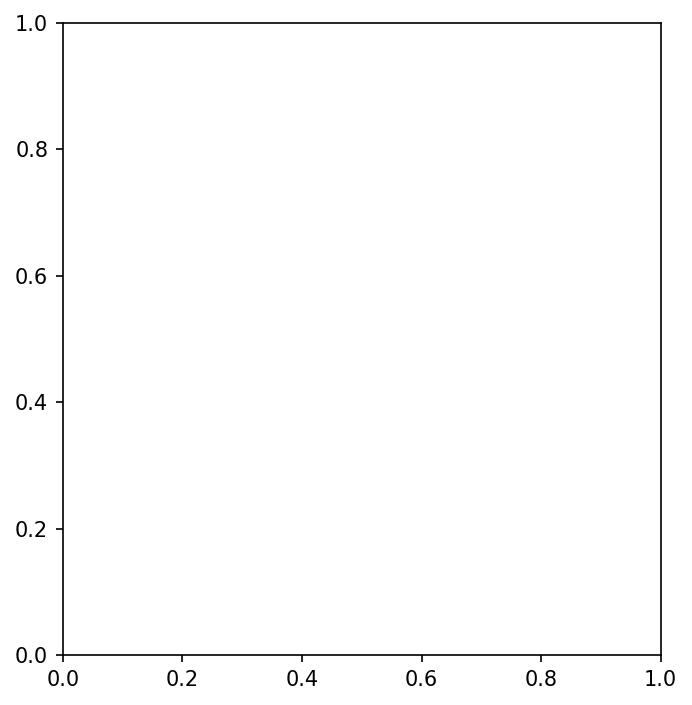

In [43]:
signal = np.mean(dwi.dataobj, axis=(0, 1, 2))
coord = np.asarray(get_default_coord(dwi))
vmin, vmax = get_default_vmin_vmax(dwi)

# Create plot
fig = plt.figure(layout="tight", dpi=150, figsize=(6.4, 4.8))

aspect1 = dwi.shape[1] / dwi.shape[0]
aspect2 = np.max(signal) / signal.shape[-1]
gs = GridSpec(1, 2, figure=fig, width_ratios=[aspect1, aspect2])

# Plot frame over time
ax1 = fig.add_subplot(gs[0, 0])
frame = noimg.render_slice(
    noimg.index_img(dwi, 0),
    axis=2,
    coord=coord,
    vmin=vmin,
    vmax=vmax,
    fontsize=18,
)
frame = noimg.annotate(
    frame, text=f"T=0", loc="upper right", size=fontsize
)
im = ax1.imshow(frame, cmap="gray")
ax1.axis("off")

# Plot signal over time
ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(range(0, signal.shape[-1], 1), signal)
dot, = ax2.plot([], [], 'ro')
ax2.set_xlim(0, signal.shape[-1]+1)
ax2.set_ylim(0, np.max(signal) + 1)
# aspect = w / h / 2
# ax2.set_aspect(aspect)
ax2.set_xlabel("Volume")
ax2.set_ylabel("Signal")

def _update(t: int):
    dot.set_data([t], [signal[t]])
    frame = noimg.render_slice(
        noimg.index_img(dwi, t),
        axis=2,
        coord=coord,
        vmin=vmin,
        vmax=vmax,
        fontsize=18,
    )
    im.set_data(frame)

fig.suptitle('Average signal over time')

ani = FuncAnimation(fig, _update, frames=signal.shape[-1], interval=30)

ani.save('/tmp/test.mp4', writer="ffmpeg", fps=15, dpi=150)

In [37]:
plt.close("all")